<a href="https://colab.research.google.com/github/Manya123-max/Deep-Learning-Algorithms-/blob/main/Deep9_LSTM_PartA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import yfinance as yf
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

[*********************100%***********************]  1 of 1 completed


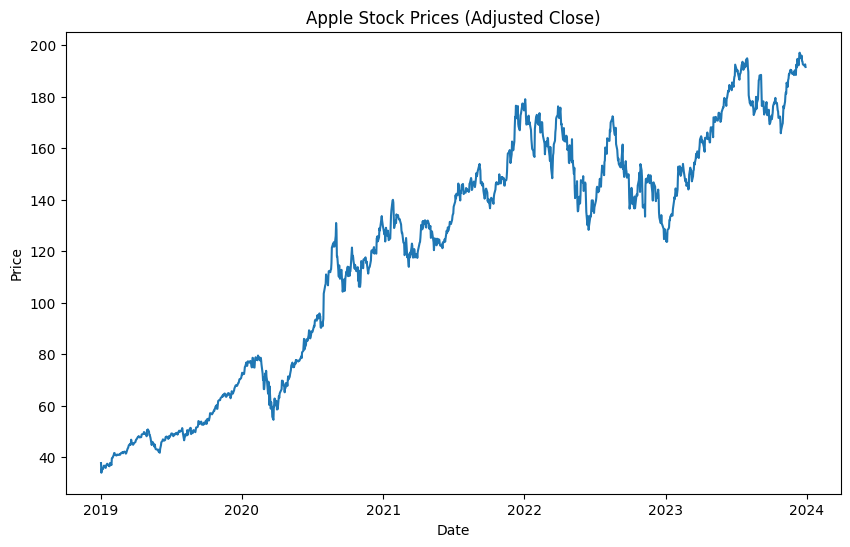

In [ ]:
# Download historical stock data (last 5 years)
stock_data = yf.download('AAPL', start='2019-01-01', end='2024-01-01')
# Use 'Adj Close' for predictions, It is adjusted closing price of stock
stock_data = stock_data[['Adj Close']]
#Plot the stock data
plt.figure(figsize=(10, 6))
plt.plot(stock_data)
plt.title('Apple Stock Prices (Adjusted Close)')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()


In [ ]:
# Function to create sequences (X, y) for LSTM input
def create_sequences(data, time_steps=60):
  X, y = [], []
  for i in range(len(data) - time_steps):
     X.append(data[i:i + time_steps, 0])
     y.append(data[i + time_steps, 0])
  return np.array(X), np.array(y)

In [ ]:
#Scale the stock prices to range between 0 and 1
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(stock_data)
# Split data into train and test sets (80% train, 20% test)
train_size = int(len(scaled_data) * 0.8)
train_data, test_data = scaled_data[:train_size], scaled_data[train_size:]
# Create sequences for train and test sets
time_steps = 60
X_train, y_train = create_sequences(train_data, time_steps)
X_test, y_test = create_sequences(test_data, time_steps)
# Reshape X_train and X_test to be in the format [samples, time steps, features]
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)


In [ ]:
"""model = Sequential()
# Add LSTM layer
model.add(LSTM(units=50, return_sequences=False, input_shape=(X_train.shape[1], 1)))
# Dropout layer to prevent overfitting
model.add(Dropout(0.2))
# Dense layer to output the final prediction
model.add(Dense(units=1))"""
# Define the LSTM model using Input layer
model = Sequential([
    Input(shape=(X_train.shape[1], 1)),  # Define input shape here
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)  # Output layer
])

In [ ]:
model = Sequential()
# Add the first LSTM layer (with return_sequences=True for stacking)
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
# Add a second LSTM layer (with return_sequences=True to continue stacking)
model.add(LSTM(units=50, return_sequences=True))
# Add a third LSTM layer (with return_sequences=False to get a single output at the end)
model.add(LSTM(units=50, return_sequences=False))
# Dropout layer to prevent overfitting
model.add(Dropout(0.2))
# Dense layer to output the final prediction
model.add(Dense(units=1))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Print model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 60, 50)              │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_4 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# 5. Train the Model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 9s 124ms/step - loss: 0.1417 - val_loss: 0.0016
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0081 - val_loss: 0.0028
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 86ms/step - loss: 0.0048 - val_loss: 0.0040
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 101ms/step - loss: 0.0043 - val_loss: 0.0025
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0032 - val_loss: 0.0058
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 87ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 107ms/step - loss: 0.0033 - val_loss: 0.0023
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 116ms/step - loss: 0.0034 - val_loss: 0.0023
Epoch 9/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss: 0.0031 - val_loss: 0.0053
Epoch 10/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 11/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 129ms/step - loss: 0.0035 - val_loss: 0.0061
Epoch 12/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 4s 87ms/step - loss

In [ ]:
#6. Make Predictions
predictions = model.predict(X_test)
# Inverse transform the predictions and actual values to original scale
predictions_rescaled = scaler.inverse_transform(predictions)
y_test_rescaled = scaler.inverse_transform(y_test.reshape(-1, 1))


6/6 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step


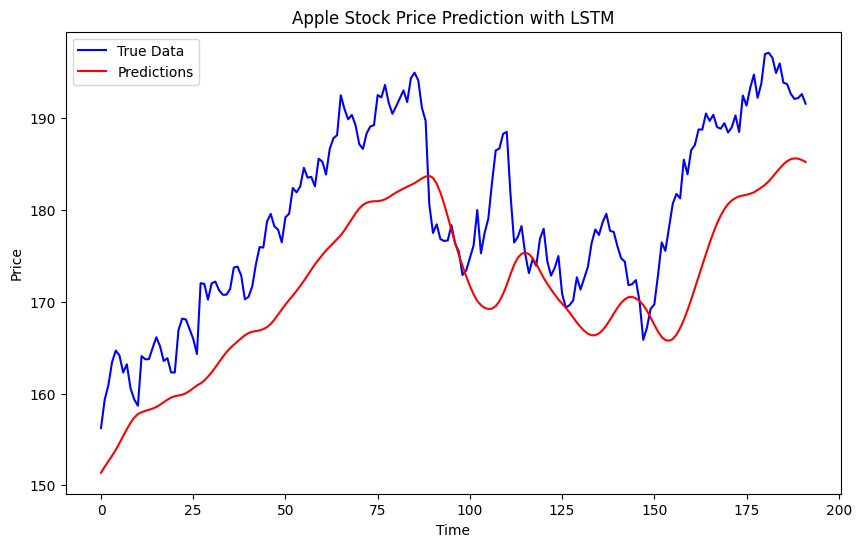

In [ ]:
# 7. Plot the Results
plt.figure(figsize=(10, 6))
plt.plot(y_test_rescaled, label='True Data', color='blue')
plt.plot(predictions_rescaled, label='Predictions', color='red')
plt.title('Apple Stock Price Prediction with LSTM')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()

# 8. Save the Model
model.save('apple_stock_prediction_model.h5')

In [ ]:
# Optionally, you can evaluate the model using metrics like RMSE:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(y_test_rescaled, predictions_rescaled))
print(f'RMSE: {rmse}')

RMSE: 9.008648253559937
